In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv('loan_dataset.csv')

In [3]:
#we will understand the dataset
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#calculating the number of missing values in the column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#we will need to handle the missing values --> but we will do it later
#but in order to manipulate the data-> we have to check the skewness and-> then we will decide whether to use the mean or median

In [8]:
#we are first changing the text data to 0 and 1
#also, there can only be 1 target

In [10]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [11]:
df.corr()

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\1952600141.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

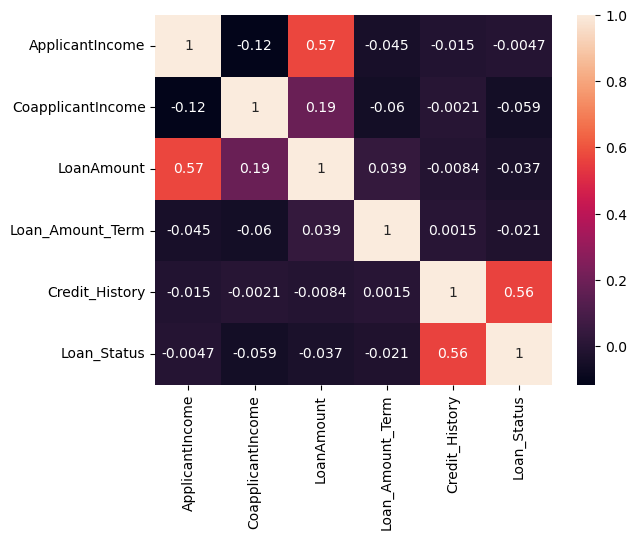

In [12]:
#now we are going to check the correlation between the features and target as well as with the other features
sns.heatmap(df.corr(),annot=True)

In [13]:
#categorical encoding
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)

In [14]:
df['Married'].replace('Yes',1,inplace=True)
df['Married'].replace('No',0,inplace=True)

In [15]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
df['Education'].replace('Graduate',1,inplace=True)
df['Education'].replace('Not Graduate',0,inplace=True)

In [17]:
df['Self_Employed'].replace('Yes',1,inplace=True)
df['Self_Employed'].replace('No',0,inplace=True)

In [18]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [19]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
#aab hamne loan id ko drop karange aur eiske index position 1 hai
df.drop('Loan_ID',axis=1,inplace=True)

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


In [22]:
#drop first sai haam phale wale column ko drop kar daite hai
df_new=pd.get_dummies(df,drop_first=True)

In [23]:
#to aab RURAL AREA ko remove kar diya gaya hai PROPERTY AREA mai sai
#aur DEPENDENTS 0 ko remove kar diya gaya hai DEPENDENTS mai sai 
df_new

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0
610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,1,0,0
611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1
612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,1,0,0,1


In [24]:
#yai features data hai
X=df_new.drop('Loan_Status',axis=1)
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,0,0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,0,0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0
610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,0,1,0,0
611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,0,0,0,1
612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1,0,0,1


In [25]:
#yai target data hai
Y=df_new['Loan_Status']
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [40]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.0/99.8 MB 281.8 kB/s eta 0:05:54
   ---------------------------------------- 0.1/99.8 MB 419.2 kB/s eta 0:03:58
   ---------------------------------------- 0.1/99.8 MB 403.5 kB/s eta 0:04:07
   ---------------------------------------- 0.1/99.8 MB 364.4 kB/s eta 0:04:34
   ---------------------------------------- 0.1/99.8 MB 405.9 kB/s eta 0:04:06
   ---------------------------------------- 0.2/99.8 MB 456.4 kB/s eta 0:03:39
   ---------------------

In [26]:
import xgboost

In [27]:
xg=xgboost.XGBClassifier()

In [28]:
xg.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
#Yai batyaga haar features ki kitni importance hai in terms of number
xg.feature_importances_

array([0.03767952, 0.04865581, 0.06200303, 0.04303022, 0.04324704,
       0.05526746, 0.04639356, 0.05819184, 0.3846505 , 0.04343311,
       0.04151919, 0.02940268, 0.06689445, 0.03963162], dtype=float32)

In [30]:
#yai batyaga X kai kitne columns hai
X.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

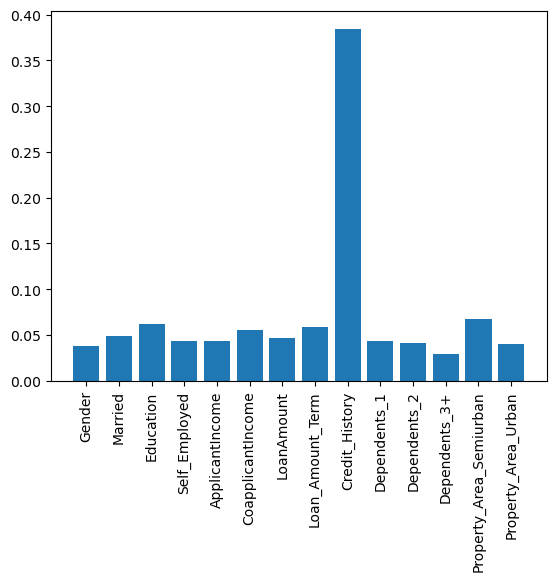

In [31]:
#eisme X.column jo hai wo X axis mai ayaga aur xg.feature_importances_ jo hai wo Y axis mai ayaga 
plt.bar(X.columns,xg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [32]:
#exploring the data and handling the missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
df_new['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [34]:
#eisme hamne dekha ki GENDER mai 13 values khali hai-->to hamne aun values ko MALES mai add kar diya hai ie 489+13=502
#asa eisliye kiya kui ki GENDER CATEGORICAL Data hai aur eisme eiska MODE- Male hai to males values ko add kiya hamne

In [35]:
#fillna means null value mai Males(1) ko fill karo
df_new['Gender'].fillna(1.0,inplace=True)

In [36]:
df_new['Gender'].value_counts()

1.0    502
0.0    112
Name: Gender, dtype: int64

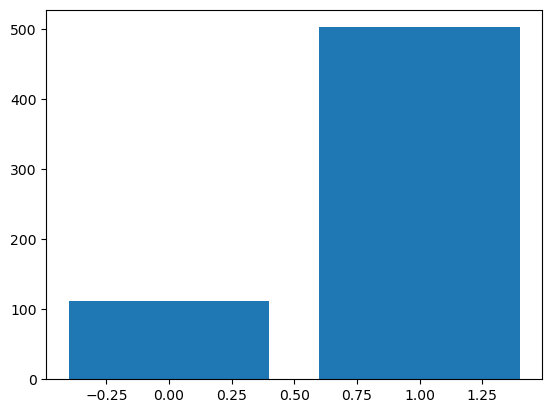

In [37]:
df_gender=df_new['Gender'].value_counts()
plt.bar(df_gender.index,df_gender.values)
plt.show()

In [38]:
df_new.isnull().sum()

Gender                      0
Married                     3
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [39]:
df_new['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [40]:
df_new['Married'].fillna(1.0,inplace=True)

In [41]:
df_new['Married'].value_counts()

1.0    401
0.0    213
Name: Married, dtype: int64

In [42]:
df_new.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [43]:
df_new['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [44]:
df_new['Self_Employed'].fillna(0.0,inplace=True)

In [45]:
df_new['Self_Employed'].value_counts()

0.0    532
1.0     82
Name: Self_Employed, dtype: int64

In [46]:
df_new.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [47]:
df_new['LoanAmount'].skew()

2.677551679256059

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

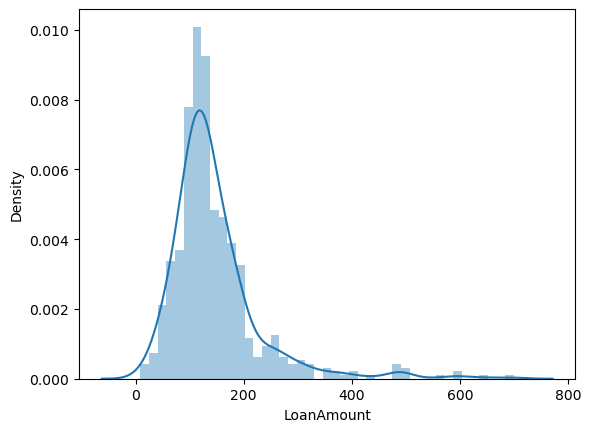

In [48]:
sns.distplot(df['LoanAmount'])

In [49]:
#median is more stable in this case as our data is non symmetrical in nature

In [50]:
#df_new['Married'].fillna(1.0,inplace=True) in terms of categorical data
#and in continuous data we use the below execution
df_new['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\3779985088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

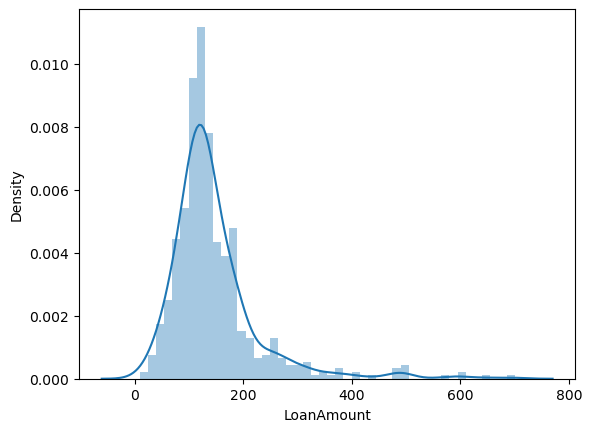

In [51]:
sns.distplot(df_new['LoanAmount'])

In [52]:
df_new.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.00000,0.842199,0.687296,0.166124,0.164495,0.083062,0.379479,0.328990
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,65.12041,0.364878,0.463973,0.372495,0.371027,0.276201,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
#value<(Q1-(1.5*IQR))-->VALUE=LoanAmount
#value>(Q3+(1.5*IQR))

In [54]:
IQR_LOANAMOUNT=164.75-100.25

In [55]:
np.where(df['LoanAmount']<(100.25-(1.5*IQR_LOANAMOUNT)))

(array([], dtype=int64),)

In [56]:
np.where(df['LoanAmount']>(164.75+(1.5*IQR_LOANAMOUNT)))

(array([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
        177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
        381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
        600, 604], dtype=int64),)

In [57]:
#as approximately 3-4%, we have outliners. So, we are going to remove it.

In [58]:
df_new.drop([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
        177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
        381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
        600, 604],axis=0,inplace=True)

In [59]:
df_new.shape

(573, 15)

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\3779985088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

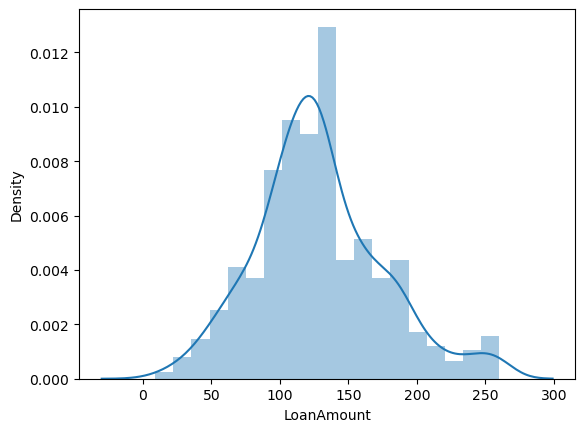

In [60]:
sns.distplot(df_new['LoanAmount'])

In [61]:
df_new.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term           14
Credit_History             45
Loan_Status                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [62]:
df_new['Loan_Amount_Term'].value_counts()

360.0    478
180.0     40
480.0     14
300.0     11
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [63]:
df_new['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [64]:
df_new.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             45
Loan_Status                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [65]:
df_new['Credit_History'].value_counts()

1.0    444
0.0     84
Name: Credit_History, dtype: int64

In [66]:
df_new['Credit_History'].fillna(1.0,inplace=True)

In [67]:
df_new.isnull().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [68]:
df_new.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.813264,0.645724,0.767888,0.127400,4649.900524,1478.729354,128.483421,342.408377,0.853403,0.692845,0.160558,0.167539,0.069808,0.383944,0.328098
std,0.390040,0.478711,0.422549,0.333711,3648.848734,2348.664738,46.377274,64.856437,0.354013,0.461717,0.367444,0.373783,0.255046,0.486770,0.469931
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2769.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3691.000000,1210.000000,125.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5250.000000,2223.000000,155.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,39147.000000,33837.000000,260.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#feature scaling

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\2026590042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

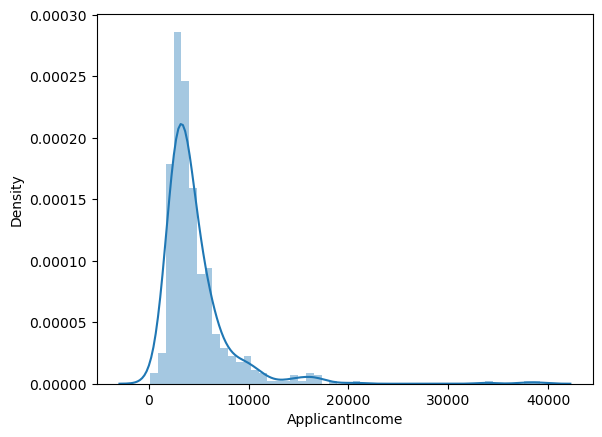

In [69]:
sns.distplot(df_new['ApplicantIncome'])

In [70]:
IQR_APP=5250-2769

In [71]:
np.where(df_new['ApplicantIncome']<(2769-(1.5*IQR_APP)))

(array([], dtype=int64),)

In [72]:
np.where(df_new['ApplicantIncome']>(5250+(1.5*IQR_APP)))

(array([ 22,  95,  99, 108, 112, 120, 128, 134, 136, 138, 142, 146, 152,
        169, 171, 175, 177, 185, 196, 231, 238, 253, 265, 270, 299, 311,
        327, 345, 363, 395, 405, 408, 413, 437, 445, 448, 453, 462, 477,
        498, 499, 521, 555, 559], dtype=int64),)

In [74]:
df_new.drop([ 22,  95,  99, 108, 112, 120, 128, 134, 136, 138, 142, 146, 152,
        169, 175, 185, 196, 231, 238, 265, 270, 299, 311,
        327, 345, 363, 395, 405, 408, 413, 437, 445, 448, 453, 462, 477,
        498, 499, 521, 555, 559],axis=0,inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\2026590042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

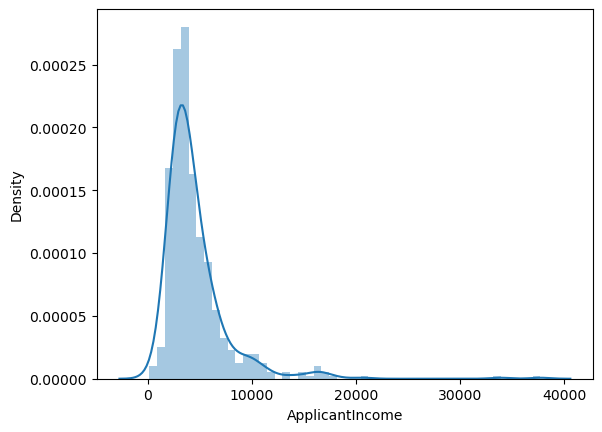

In [75]:
sns.distplot(df_new['ApplicantIncome'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_122032\1301072150.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

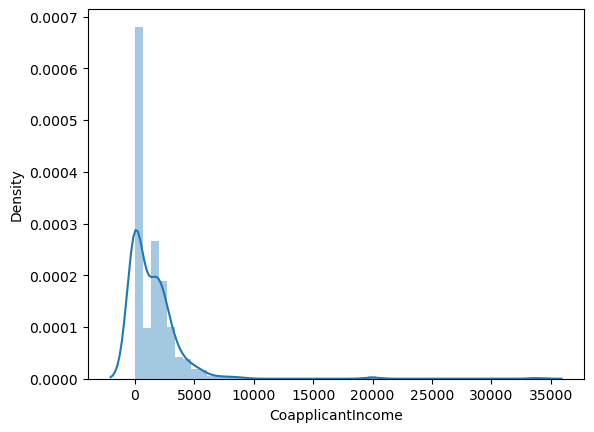

In [76]:
sns.distplot(df_new['CoapplicantIncome'])

In [77]:
df_new.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.810150,0.642857,0.757519,0.125940,4562.107143,1465.967895,128.078947,342.631579,0.860902,0.693609,0.159774,0.169173,0.075188,0.379699,0.336466
std,0.392551,0.479608,0.428987,0.332094,3369.716933,2400.575273,45.950286,65.614232,0.346374,0.461428,0.366742,0.375257,0.263943,0.485769,0.472945
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2761.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3675.500000,1128.500000,125.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5171.500000,2167.250000,155.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,37719.000000,33837.000000,260.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_new

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0
610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,1,0,0
611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1
612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,1,0,0,1


In [79]:
#seperating the feature data and target data
X=df_new.drop('Loan_Status',axis=1)
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,0,0,0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,0,0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0
610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,0,1,0,0
611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,0,0,0,1
612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1,0,0,1


In [80]:
Y=df_new['Loan_Status']
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 532, dtype: int64

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
mn=MinMaxScaler()

In [83]:
X_new=mn.fit_transform(X)

In [84]:
X_new.shape

(532, 14)

In [85]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 532, dtype: int64

In [86]:
X_new

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [95]:
#spliting it into tw training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3)

In [96]:
X_train

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 0.]])

In [97]:
Y_train

272    1
545    1
24     0
36     0
397    1
      ..
279    1
341    0
377    1
418    1
343    1
Name: Loan_Status, Length: 372, dtype: int64

In [98]:
X_test

array([[1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.]])

In [99]:
Y_test

340    0
127    1
480    1
167    1
6      1
      ..
568    0
18     0
560    1
476    1
19     1
Name: Loan_Status, Length: 160, dtype: int64

In [100]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(372, 14)
(372,)
(160, 14)
(160,)


In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [102]:
Y_predict=lr.predict(X_test)
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [103]:
Y_test

340    0
127    1
480    1
167    1
6      1
      ..
568    0
18     0
560    1
476    1
19     1
Name: Loan_Status, Length: 160, dtype: int64

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_predict))

[[ 18  29]
 [  2 111]]


In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.90      0.38      0.54        47
           1       0.79      0.98      0.88       113

    accuracy                           0.81       160
   macro avg       0.85      0.68      0.71       160
weighted avg       0.82      0.81      0.78       160

